<a href="https://colab.research.google.com/github/StalkYy-06/5CS037-2024/blob/main/swarnim_rai_2414970_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
#importing dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/crop_yield.csv')

## Exploratory Data Analysis Statistical Interpretation and Visualizations

In [5]:
#inspecting first few rows of the dataset
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [6]:
# checking basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [7]:
#checking for null values
df.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


In [8]:
# checking for duplicate values
print(f"number of duplicates : {df.duplicated().sum()}")

number of duplicates : 0


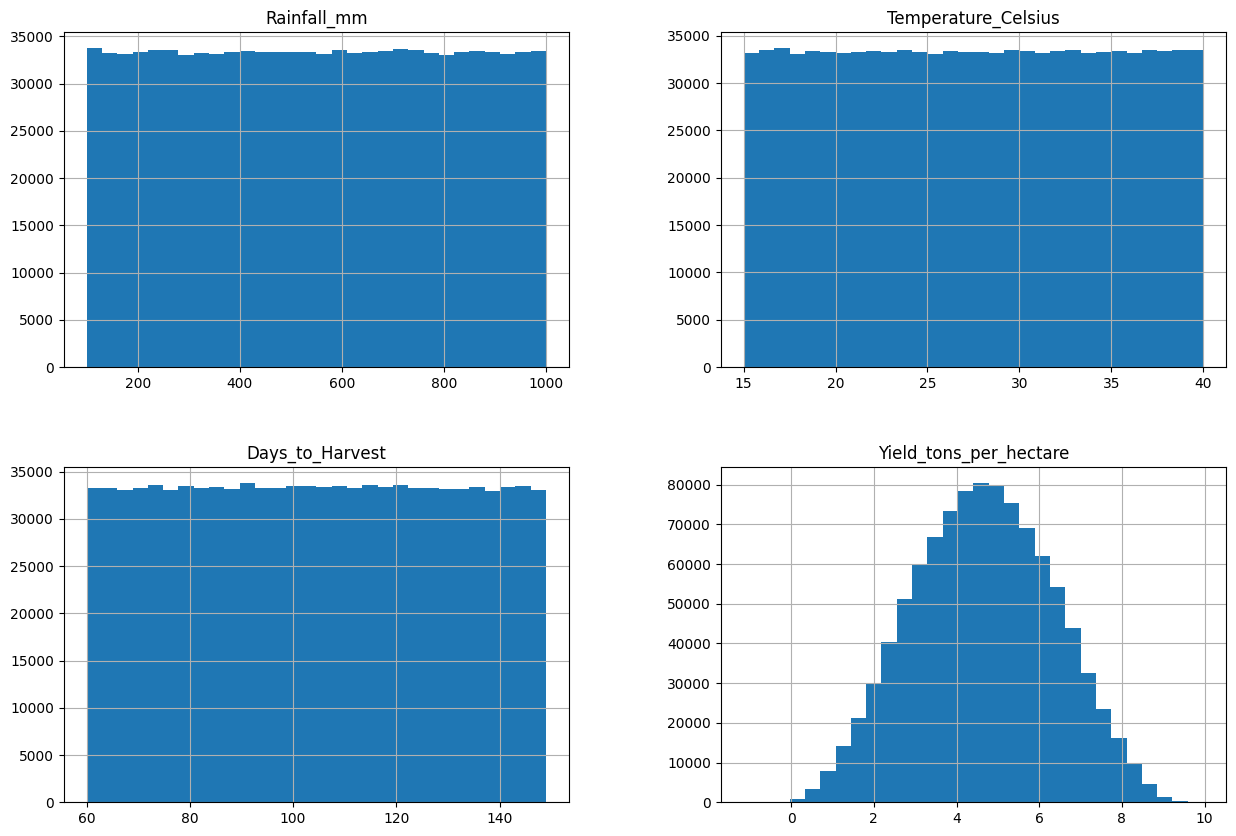

In [9]:
# Visualize the distribution of numerical features
df.hist(bins=30, figsize=(15, 10))
plt.show()

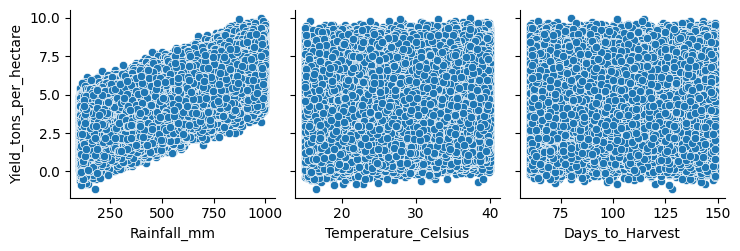

In [10]:
# Visualizing relationships between features and target
sns.pairplot(df, x_vars=['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest'], y_vars=['Yield_tons_per_hectare'])
plt.show()

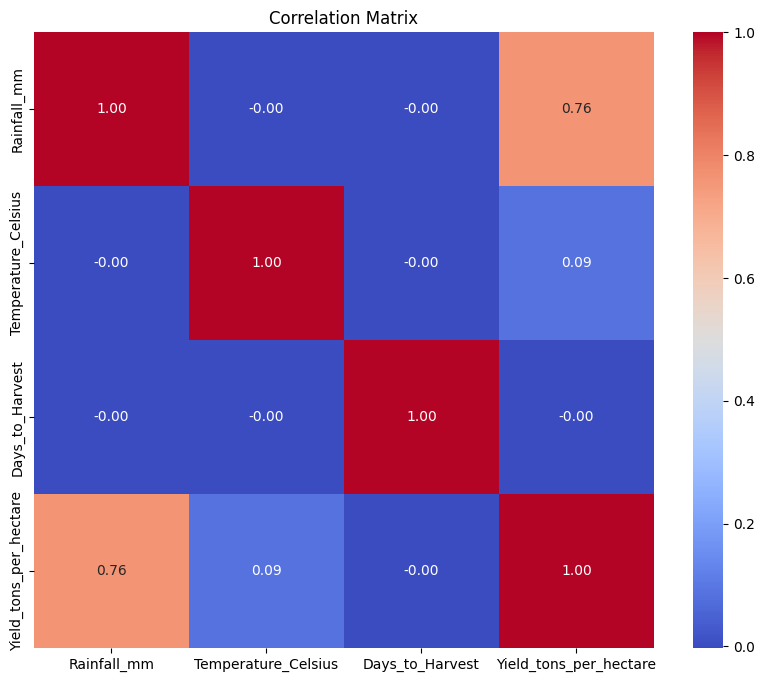

In [34]:
num_data= df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = num_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

## Build linear regression from scratch

In [11]:
#Define the cost function
def cost_function(X, y, W):
  """ Parameters:
  This function finds the Mean Square Error.
  Input parameters:
  X: Feature Matrix
  Y: Target Matrix
  W: Weight Matrix
  Output Parameters:
  cost: accumulated mean square error.
  """

  #calculating the predictions
  y_pred = X.dot(W.T)

  #number of samples
  n = len(y)

  #calculating mean square error
  cost = (1 / (2 * n)) * np.sum((y_pred - y) ** 2)
  return cost

In [12]:
# Test case
X_test = np.array([[1, 2], [3, 4], [5, 6]])
y_test = np.array([3, 7, 11])
W_test = np.array([1, 1])
cost = cost_function(X_test, y_test, W_test)
print("Cost function output:", cost_function(X_test, y_test, W_test))

Cost function output: 0.0


In [13]:
def gradient_descent(X, y, W, alpha, iterations):
  """
  Perform gradient descent to optimize the parameters of a linear regression model.
  Parameters:
  X (numpy.ndarray): Feature matrix (m x n).
  y (numpy.ndarray): Target vector (m x 1).
  W (numpy.ndarray): Initial guess for parameters (n x 1).
  alpha (float): Learning rate.
  iterations (int): Number of iterations for gradient descent.
  Returns:
  tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values
  .
  W_update (numpy.ndarray): Updated parameters (n x 1).
  cost_history (list): History of cost values over iterations.
  """

  # Initialize cost history
  cost_history = [0] * iterations
  # Number of samples
  m = len(y)
  for iteration in range(iterations):
    # Step 1: Hypothesis Values
    y_pred = X.dot(W)

    # Step 2: Difference between Hypothesis and Actual Y
    loss = y_pred - y

    # Step 3: Gradient Calculation
    dw = (1/m) * X.T.dot(loss)

    # Step 4: Updating Values of W using Gradient
    W_update = W - alpha * dw

    # Step 5: New Cost Value
    cost = cost_function(X, y, W_update)
    cost_history[iteration] = cost

  return W_update, cost_history

In [14]:
# Model Evaluation - RMSE
def rmse(y, y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
  y: Array of actual(Target) Dependent Varaibles.
  y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rmse: Root Mean Square.
  """
  rmse = np.sqrt(np.mean((y - y_pred) ** 2))
  return rmse

In [15]:
# Model Evaluation - R2
def r2(y, y_pred):
  """
  This Function calculates the R Squared Error.
  Input Arguments:
  y: Array of actual(Target) Dependent Varaibles.
  y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rsquared: R Squared Error.
  """
  mean_y = np.mean(y)

  ss_tot = np.sum((y - mean_y) ** 2)

  ss_res = np.sum((y - y_pred) ** 2)

  r2 = 1 - (ss_res / ss_tot)
  return r2

Final Weights: [0.02894358 0.00128713]
Cost History (First 10 iterations): [83.81979335279428, 83.81979335279428, 83.81979335279428, 83.81979335279428, 83.81979335279428, 83.81979335279428, 83.81979335279428, 83.81979335279428, 83.81979335279428, 83.81979335279428]
RMSE on Test Set: 14.762065126747224
R-Squared on Test Set: -54.23239262365917


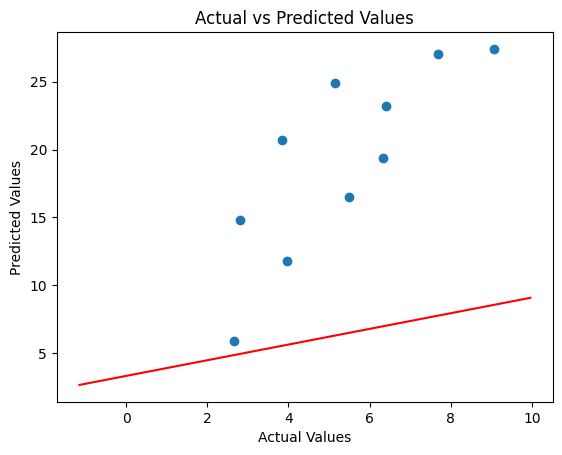

In [16]:
# Main Function
def main():
  X = df[['Rainfall_mm','Temperature_Celsius']].values
  y = df['Yield_tons_per_hectare'].values

  # Step 3: Split the data into training and test sets (80% train, 20% test)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=42)

  # Step 4: Initialize weights (W) to zeros, learning rate and number of iterations
  W = np.zeros(X_train.shape[1]) # Initialize weights
  alpha = 0.00001 # Learning rate
  iterations = 1000 # Number of iterations for gradient descent

  # Step 5: Perform Gradient Descent
  W_optimal, cost_history = gradient_descent(X_train, y_train, W, alpha, iterations)

  # Step 6: Make predictions on the test set (only first 10 rows)
  y_pred = np.dot(X_test[:10], W_optimal)

  # Step 7: Evaluate the model using RMSE and R-Squared
  model_rmse = rmse(y_test[:10], y_pred)
  model_r2 = r2(y_test[:10], y_pred)

  # Step 8: Output the results
  print("Final Weights:", W_optimal)
  print("Cost History (First 10 iterations):", cost_history[:10])
  print("RMSE on Test Set:", model_rmse)
  print("R-Squared on Test Set:", model_r2)

  # Assuming y_test is your actual values and y_pred is your predicted values
  plt.scatter(y_test[:10],y_pred)
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Actual vs Predicted Values')
  plt.plot([min(y_test), max(y_test)], [min(y_test[:10]), max(y_test[:10])], color='red')  # Diagonal line
  plt.show()

# Execute the main function
if __name__ == "__main__":
  main()

## Building two models for regression


In [17]:
# Importing necessary modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
#One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Region', 'Soil_Type', 'Crop', 'Weather_Condition'], drop_first=True)

In [19]:
# splitting the dataset into feature and target variable

X = df.drop('Yield_tons_per_hectare',axis=1)
y = df['Yield_tons_per_hectare']

print(X.shape)
print(y.shape)

(1000000, 20)
(1000000,)


In [20]:
#splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.95, random_state=42)

# Checking the shape of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 20)
X_test shape: (950000, 20)
y_train shape: (50000,)
y_test shape: (950000,)


In [21]:
# Model 1 : Linear Regression
lr_model = SklearnLinearRegression()
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)

In [22]:
# Model 2: Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [23]:
# Evaluating models
def evaluate_model(y_true, y_pred, model_name):
  mae = mean_absolute_error(y_true,y_pred)
  rmse = np.sqrt(mean_squared_error(y_true,y_pred))
  r2 = r2_score(y_true,y_pred)
  print(f"{model_name} - MAE: {mae}, RMSE: {rmse}, R²: {r2}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")

Linear Regression - MAE: 0.3994745022551964, RMSE: 0.5007433492282175, R²: 0.9129041049957903
Random Forest Regression - MAE: 0.41640113819277186, RMSE: 0.5220330364733959, R²: 0.9053407013148465


## Hyper-parameter Optimization with Cross-Validation

In [24]:
# importing necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge

#### For Model 1:

In [25]:
ridge = Ridge()

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Regularization strength
}

grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X, y)  # Assuming y is the target variable for regression

# Best hyperparameters for Ridge Regression
best_ridge_params = grid_search_ridge.best_params_
print("Best Hyperparameters for Ridge Regression:", best_ridge_params)

Best Hyperparameters for Ridge Regression: {'alpha': 1}


#### For Model 2:

In [26]:
rf = RandomForestRegressor(random_state=42)

param_grid_rf = {
    'n_estimators': [10, 50],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_grid_rf, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42
)
random_search_rf.fit(X, y)

# Best hyperparameters for Random Forest
best_rf_params = random_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_rf_params)

Best Hyperparameters for Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


## Feature Selection :

In [27]:
#importing necessary modules

from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

#### Model 1:

In [28]:
# Feature Selection for Linear Regression using RFE
lr_model = SklearnLinearRegression()
rfe = RFE(lr_model, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features_lr_rfe = X_train.columns[rfe.support_].tolist()

In [29]:
# Feature Selection for Linear Regression using Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
selected_features_lr_lasso = X_train.columns[np.abs(lasso.coef_) > 0].tolist()

In [30]:
# Combine results for Linear Regression
selected_features_lr = list(set(selected_features_lr_rfe + selected_features_lr_lasso))

#### Model 2:

In [31]:
# Feature Selection for Random Forest using Feature Importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
selected_features_rf = feature_importances_rf.nlargest(5).index.tolist()

In [32]:
# Update training and test sets with selected features
X_train_selected = X_train[selected_features_lr]
X_test_selected = X_test[selected_features_lr]
X_train_rf_selected = X_train[selected_features_rf]
X_test_rf_selected = X_test[selected_features_rf]

# Display selected features for both models
print("Selected Features for Linear Regression:", selected_features_lr)
print("Selected Features for Random Forest:", selected_features_rf)

Selected Features for Linear Regression: ['Irrigation_Used', 'Temperature_Celsius', 'Soil_Type_Sandy', 'Region_North', 'Fertilizer_Used', 'Days_to_Harvest', 'Soil_Type_Peaty', 'Rainfall_mm']
Selected Features for Random Forest: ['Rainfall_mm', 'Fertilizer_Used', 'Irrigation_Used', 'Temperature_Celsius', 'Days_to_Harvest']


## Final Module :

In [33]:
# Rebuilding the models with optimal hyperparameters and selected features

# Using best hyperparameters found in Task 4
best_linear_alpha = best_ridge_params['alpha']
best_rf_params = best_rf_params  # Already extracted

# Rebuild the Linear Regression Model
final_linear = SklearnLinearRegression()
final_linear.fit(X_train_selected, y_train)
y_pred_linear = final_linear.predict(X_test_selected)

# Rebuild the Random Forest Model
final_rf = RandomForestRegressor(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    max_features=best_rf_params['max_features'],
    random_state=42
)
final_rf.fit(X_train_rf_selected, y_train)
y_pred_rf = final_rf.predict(X_test_rf_selected)

# Evaluate the models
def evaluate_final_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

print("Final Model Evaluation:")
evaluate_final_model(y_test, y_pred_linear, "Final Linear Regression")
evaluate_final_model(y_test, y_pred_rf, "Final Random Forest Regression")

Final Model Evaluation:
Final Linear Regression - MAE: 0.3994, RMSE: 0.5007, R²: 0.9129
Final Random Forest Regression - MAE: 0.4154, RMSE: 0.5208, R²: 0.9058


**Conclusion :**

Linear Regression performed slightly better in all three metrics:
- Lower MAE (better accuracy in absolute error terms)
- Lower RMSE (better at reducing large errors)
- Higher R² (better at explaining variance in yield prediction)

Random Forest is still strong, but slightly underperforms compared to Linear Regression in this case.